In [35]:
from filamentlib import VField
import numpy as np
import matplotlib.pyplot as plt


# Test Notebook

## Circle Tests

This first test is supposed to look at the behavior of a particle if the filament didn't itself move

Generally, these tests just serve to be a little unhelpful though as the particles would do weird things and those weird things don't give much information about what works and what doesn't

In [36]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
dCircle = lambda t : [-np.sin(t), np.cos(t), t * 0]
circlePoints = np.linspace(0,2*np.pi,1000)

s = np.array(circle(circlePoints))
ds = np.array(dCircle(circlePoints))

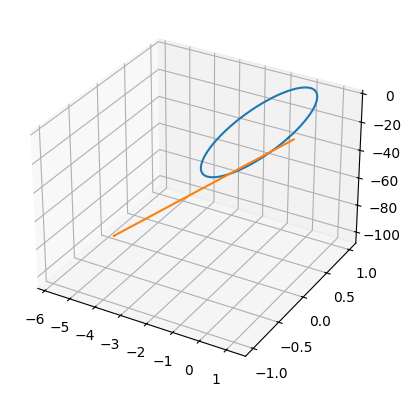

In [18]:
# Set the initial conditions to approximate the field around the curve
TOTAL_TIME = 10
TOTAL_STEPS = 100
IV = np.array([1.2,0,-0.01])

timeSlope = TOTAL_TIME / TOTAL_STEPS
pts = np.zeros([3, TOTAL_STEPS])

# Calculate the behavior of the point as if the filament wouldn't move
pts[:,0] = IV
for step in range(1,TOTAL_STEPS):
    pts[:, step] = pts[:,step - 1] + timeSlope * (VField.BiotSavart(s,ds,pts[:,step - 1]))

# Plot the trajectory on a 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot( s[0,:], s[1,:], s[2,:] )
ax.plot( pts[0,:], pts[1,:], pts[2,:] )
plt.show()

Now, the goal is to show that the field is correct around filaments.

That means that at one slice of time, what is the direction of the field over a range of points

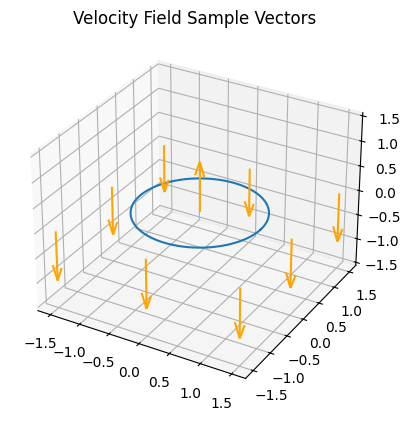

In [103]:
# Generate a bunch of points around the filament
pts = []
for i in np.linspace(-1.5,1.5,3):
    for j in np.linspace(-1.5,1.5,3):
        pts.append( np.array( [ i,j,0 ] ) )

bsPts = []

for pt in pts:
    bsPts.append( VField.BiotSavart( s, ds, pt ) )

pts = np.array( pts )
bsPts = np.array( bsPts )

# Create a 3D quiver plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(pts[:,0], pts[:,1], pts[:,2], bsPts[:,0], bsPts[:,1], bsPts[:,2], normalize=True, color='orange')

ax.set_zlim([-1.5,1.5])
ax.plot( s[0,:], s[1,:], s[2,:] )
plt.title('Velocity Field Sample Vectors')

plt.show()

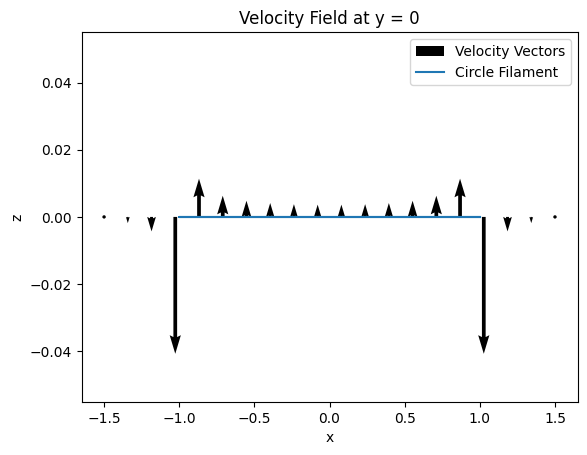

In [95]:
dom = np.linspace(-1.5,1.5,20)
posFunc = lambda t: [ t, t*0, t*0 ]
positions = np.array(posFunc( dom ))

bsPts = []
for i in range( len(positions[0,:]) ):
    bsPts.append(VField.BiotSavart(s,ds,positions[:,i]))

bsPts = np.array(bsPts)

plt.quiver( positions[0,:],positions[2,:],bsPts[:,0],bsPts[:,2] )
plt.plot( s[0,:],s[2,:] )

plt.legend(['Velocity Vectors','Circle Filament'])

plt.title('Velocity Field at y = 0')
plt.ylabel('z')
plt.xlabel('x')
plt.show()